In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [4]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1669 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1669 non-null   int64  
 1   baths           1669 non-null   float64
 2   size            1669 non-null   float64
 3   size_units      1669 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        1669 non-null   int64  
 7   price           1669 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 117.4+ KB


<Axes: >

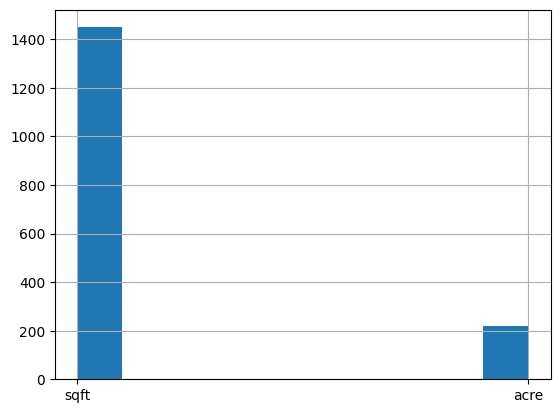

In [6]:
train_data.lot_size_units.hist()

# Convert the lots_size of the rows with lots_size_units set as "acre" to sqft as well as set lots_size_units as "sqft"

In [7]:
c = train_data.lot_size_units.count()
lot_size_units_arr = train_data.lot_size_units.__array__()
lot_size_arr = train_data.lot_size.__array__()

for i in range(c):
    if lot_size_units_arr[i] == "acre":
        lot_size_units_arr[i] = "sqft"
        lot_size_arr[i] = lot_size_arr[i] * 43560 # multiplied by some number aka. sqft/acre

train_data["lot_size_units"] = lot_size_units_arr
train_data["lot_size"] = lot_size_arr

<Axes: >

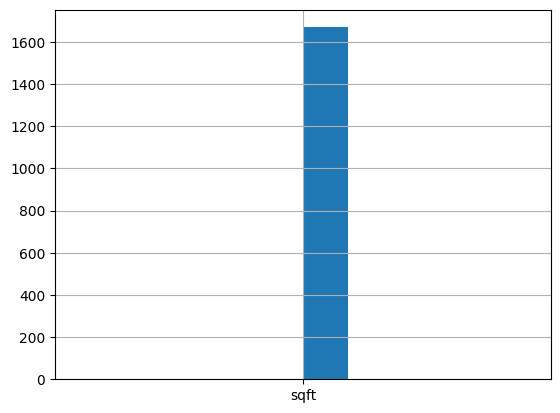

In [8]:
train_data.lot_size_units.hist()

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'lot_size'}>],
       [<Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

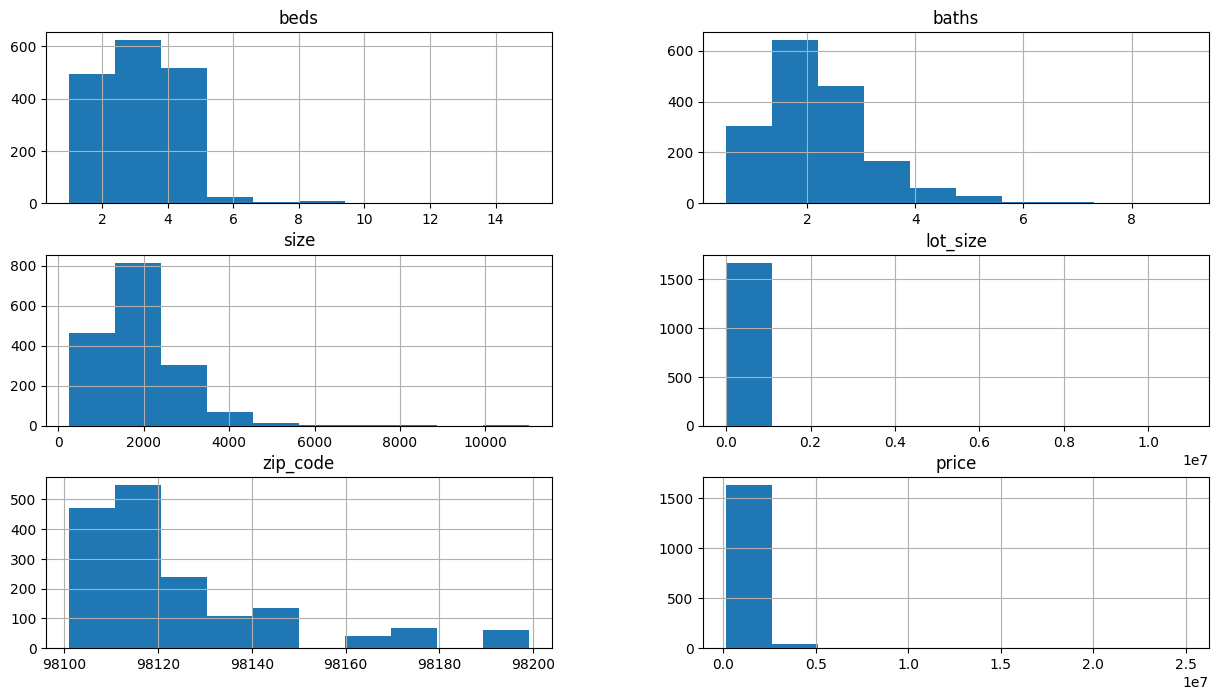

In [9]:
train_data.hist(figsize=(15, 8))

In [10]:
train_data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
5,2,2.0,1190.0,sqft,43560.0,sqft,98107,740000.0


In [11]:
# Remove the units since now they are all the same
train_data.drop(["size_units", "lot_size_units"], axis=1, inplace=True)

Handling Zip Codes

In [12]:
zipCodeArr = train_data["zip_code"].__array__()
zipCodeDF = pd.DataFrame({"ZIP": zipCodeArr})

In [19]:
zipCodeMap = pd.read_csv("zip_codes.txt")
mappedZipCodes = zipCodeDF.merge(zipCodeMap, on="ZIP", how="left")

train_data = train_data.join( [mappedZipCodes["LAT"], mappedZipCodes["LNG"]] ).drop("zip_code", axis=1)

In [ ]:
zipCodeArr = train_data["zip_code"].__array__()
zipCodeDF = pd.DataFrame({"ZIP": zipCodeArr})

zipCodeMap = pd.read_csv("zip_codes.txt")
mappedZipCodes = zipCodeDF.merge(zipCodeMap, on="ZIP", how="left")

ttest_data = train_data.join( [mappedZipCodes["LAT"], mappedZipCodes["LNG"]] ).drop("zip_code", axis=1)

<Axes: >

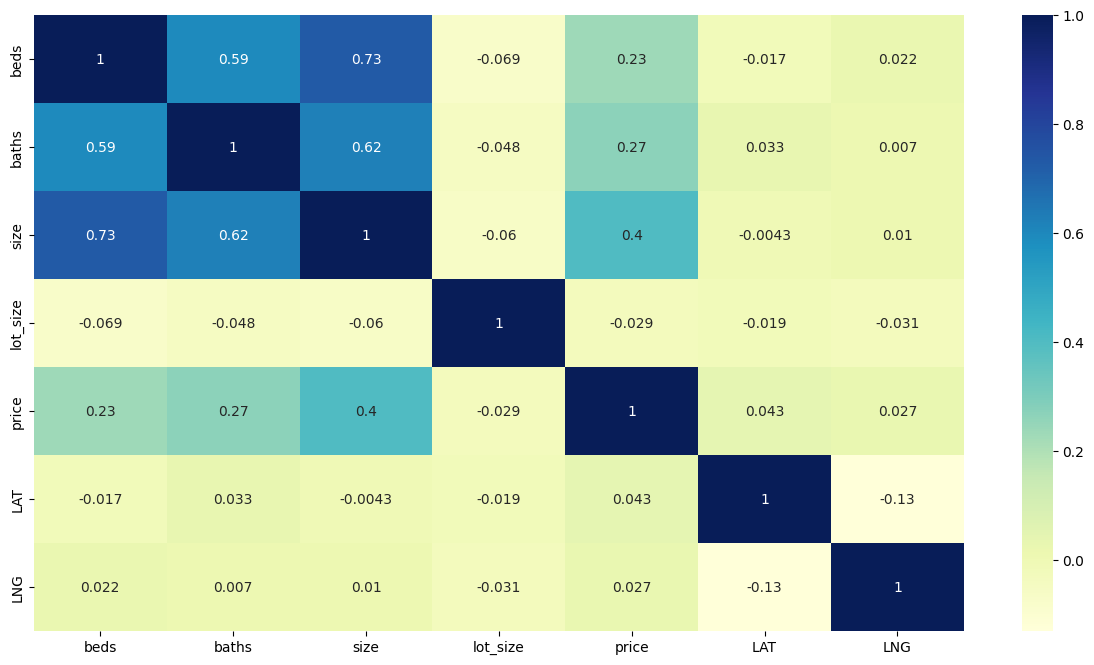

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap( train_data.corr(), annot=True, cmap="YlGnBu" )

In [15]:
c = test_data.lot_size_units.count()
lot_size_units_arr = test_data.lot_size_units.__array__()
lot_size_arr = test_data.lot_size.__array__()

for i in range(c):
    if lot_size_units_arr[i] == "acre":
        lot_size_units_arr[i] = "sqft"
        lot_size_arr[i] = lot_size_arr[i] * 43560 # multiplied by some number aka. sqft/acre

test_data["lot_size_units"] = lot_size_units_arr
test_data["lot_size"] = lot_size_arr

test_data.drop(["size_units", "lot_size_units"], axis=1, inplace=True)

In [16]:
X_train = train_data.drop("price", axis=1)
y_train = train_data["price"]

X_test = test_data.drop("price", axis=1)
y_test = test_data["price"]

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [18]:
reg.score(X_test, y_test)

0.4908908139554353

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [28]:
X_test_s = scaler.transform(X_test)

forest.score(X_test_s, y_test)

-0.1594521866974985